In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

# data = pd.read_csv('./classified_data/USA_classification_output.csv')
# data = pd.read_csv('./classified_data/Canada_classification_output.csv')
# data = pd.read_csv('./classified_data/Nigeria_classification_output.csv')
data = pd.read_csv('./classified_data/regions/west_asia/classified_data/Malaysia_classification_output.csv')
# data = pd.read_csv('./classified_data/regions/west_asia/classified_data/Philippines_classification_output.csv')

df = data[['date','predicted_label','traffic']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)

topic_stats = df.groupby('predicted_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats

C:\Users\alkrd\AppData\Local\Temp\ipykernel_14512\4018135926.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


,mean
predicted_label,
fashion,2000.000000
literature,2000.000000
accident,2818.181818
real estates,3000.000000
crime,3714.285714
military,4000.000000
bussiness,4588.235294
religion,6150.000000
art,6375.000000


<Axes: xlabel='predicted_label'>

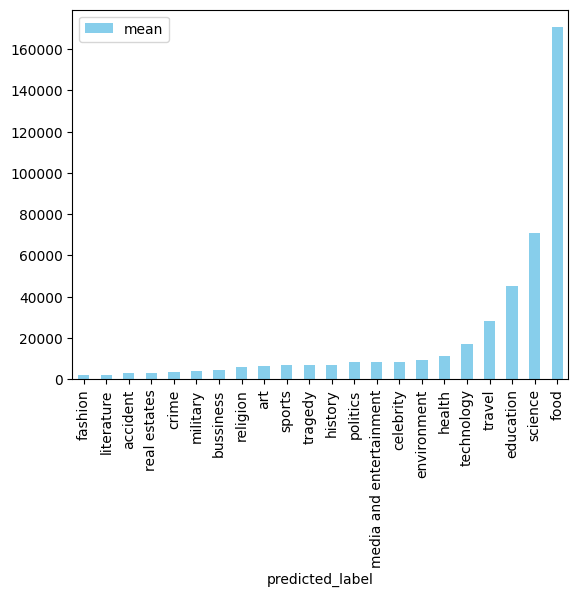

In [134]:
topic_stats.plot(kind='bar', color='skyblue')
# plt.xlabel('Category')
# plt.ylabel('Average Traffic')
# plt.title('Average Traffic by Category')
# plt.xticks(rotation=90)
# plt.show()

In [135]:
df

,date,predicted_label,traffic,traffic_numeric
0,2016-11-29,tragedy,"10,000+",10000
1,2016-11-29,media and entertainment,"2,000+",2000
2,2016-11-29,celebrity,"10,000+",10000
3,2016-11-30,celebrity,"5,000+",5000
4,2016-11-30,sports,"2,000+",2000
...,...,...,...,...
648,2017-05-04,technology,"2,000+",2000
649,2017-05-04,celebrity,"2,000+",2000
650,2017-05-04,media and entertainment,"2,000+",2000
651,2017-05-04,health,"2,000+",2000


C:\Users\alkrd\AppData\Local\Temp\ipykernel_14512\2218866047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


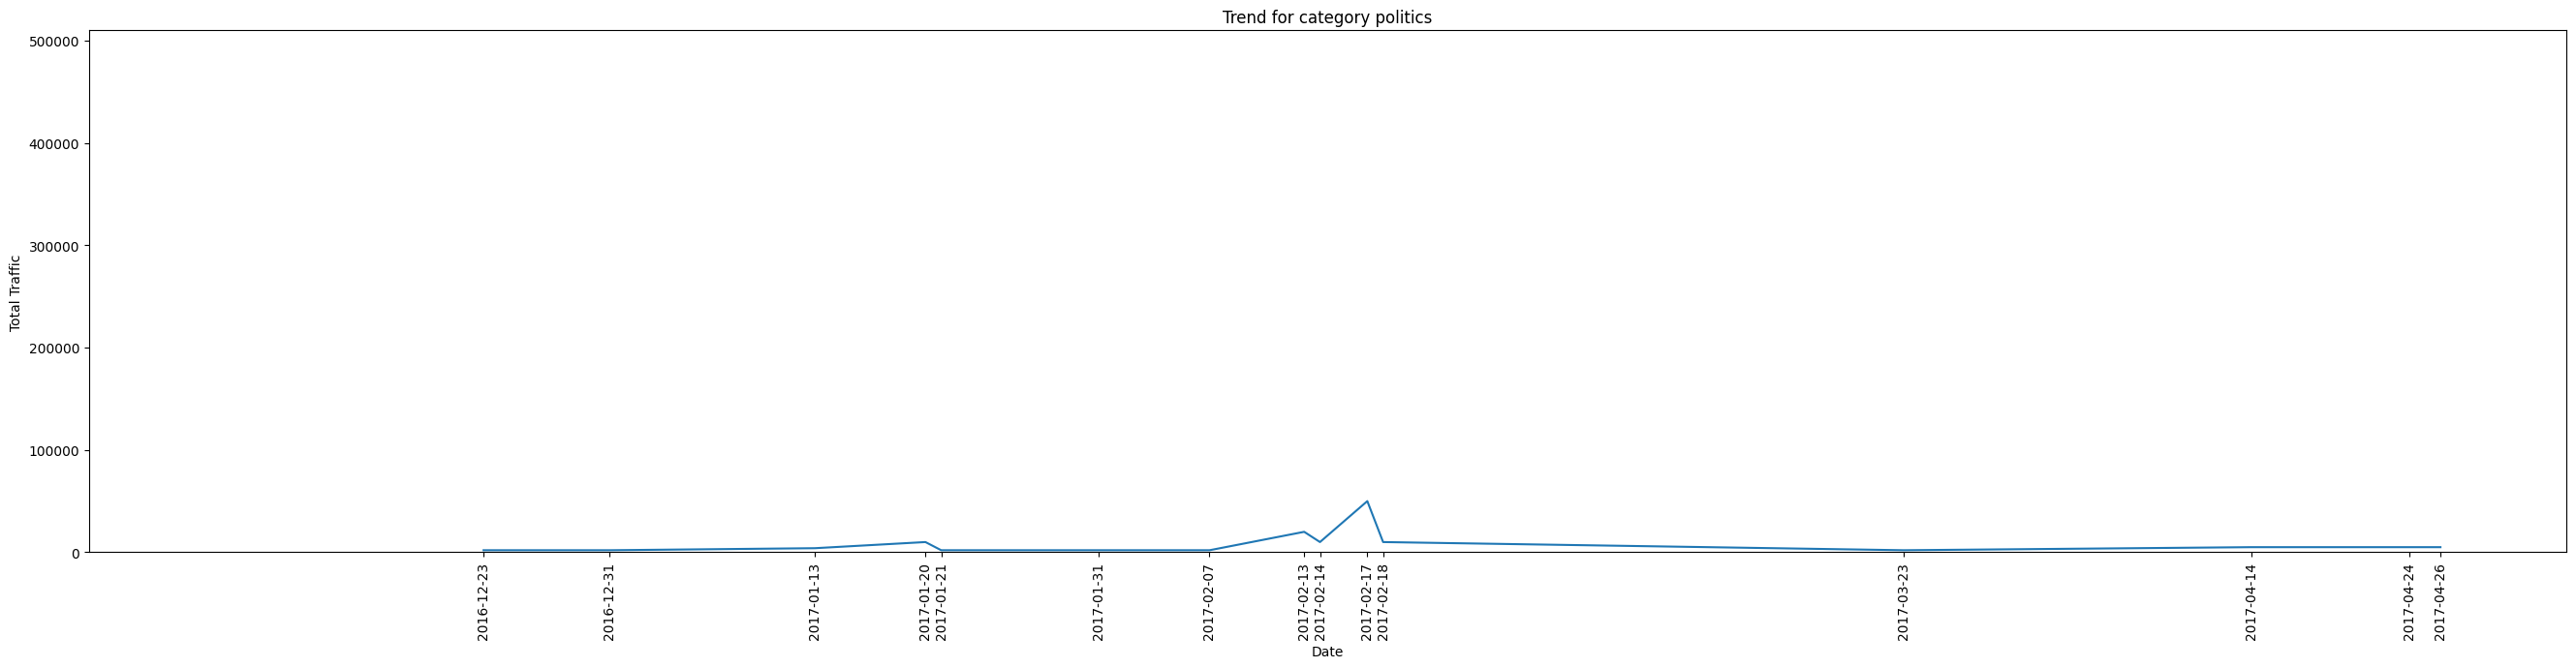

In [136]:
df['date'] = pd.to_datetime(df['date'])
maxTraffic = df['traffic_numeric'].max()

category_time_distribution = df.groupby(['date', 'predicted_label'])['traffic_numeric'].sum().reset_index(name='total_traffic')
specific_category = "politics"
specific_category_data = category_time_distribution[category_time_distribution['predicted_label'] == specific_category]

plt.figure(figsize=(33, 7))
sns.lineplot(data=specific_category_data, x='date', y='total_traffic')
plt.title(f"Trend for category {specific_category}")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(specific_category_data['date'], rotation=90)

plt.ylim(0, maxTraffic+10000)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()